In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### ***-: UPLODING '.csv' FILE FOR USE :-***

In [ ]:
from google.colab import files
print("Please upload your CSV file:")
uploaded = files.upload()
sales_data = next(iter(uploaded))

Please upload your CSV file:


Saving ecommerce_sales_data.csv to ecommerce_sales_data.csv


### ***-: CHENGING '.csv' INTO DATAFRAME :-***

In [ ]:
df = pd.read_csv(sales_data)

### ***-: BASIC DATA VARIFICATION & VALIDATION  :-***

In [ ]:
# Checking top 5 rows :-

display(df.head())

,order_id,order_date,customer_id,customer_segment,product_category,product_name,quantity,unit_price,payment_mode,region,sales
0,115795,30-04-2023,1539,Corporate,Clothing,Smartphone,1,48037,Debit Card,West,48037
1,100860,08-11-2023,1734,Home Office,Books,Cookware Set,2,46665,Debit Card,South,93330
2,176820,17-11-2023,2558,Consumer,Clothing,Headphones,4,30040,Cash on Delivery,West,120160
3,154886,03-04-2023,2519,Consumer,Clothing,Smartphone,5,23104,Credit Card,South,115520
4,106265,27-03-2023,1620,Consumer,Books,Cookware Set,5,18635,UPI,North,93175


In [ ]:
# Checking structure :-

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_id          5000 non-null   int64 
 1   order_date        5000 non-null   object
 2   customer_id       5000 non-null   int64 
 3   customer_segment  5000 non-null   object
 4   product_category  5000 non-null   object
 5   product_name      5000 non-null   object
 6   quantity          5000 non-null   int64 
 7   unit_price        5000 non-null   int64 
 8   payment_mode      5000 non-null   object
 9   region            5000 non-null   object
 10  sales             5000 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 429.8+ KB


In [ ]:
# Statistical summary :-

df.describe()

,order_id,customer_id,quantity,unit_price,sales
count,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000
mean,149418.6258,2004.794200,3.047800,25108.591600,76830.813200
std,28982.8842,572.619054,1.432873,14332.678861,60975.981802
min,100055.0000,1000.000000,1.000000,210.000000,226.000000
25%,124088.5000,1518.500000,2.000000,12762.500000,27734.750000
50%,149164.5000,1998.000000,3.000000,25032.000000,60159.500000
75%,174813.7500,2503.000000,4.000000,37558.000000,115704.250000
max,199986.0000,2999.000000,5.000000,49993.000000,249810.000000


In [ ]:
# Checking missing values :-

df.isnull().sum()

,0
order_id,0
order_date,0
customer_id,0
customer_segment,0
product_category,0
product_name,0
quantity,0
unit_price,0
payment_mode,0
region,0


### ***-: DATA CLEANING & PREPROCESSING :-***

In [ ]:
# Convert order_date to datetime :-

df["order_date"] = pd.to_datetime(df["order_date"])
df.dtypes

/tmp/ipython-input-3002250148.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["order_date"] = pd.to_datetime(df["order_date"])


,0
order_id,int64
order_date,datetime64[ns]
customer_id,int64
customer_segment,object
product_category,object
product_name,object
quantity,int64
unit_price,int64
payment_mode,object
region,object


In [ ]:
# Check & Remove Duplicates :-

df.duplicated().sum()
df = df.drop_duplicates()

In [ ]:
# Final checks :-

(df["quantity"] <= 0).sum(), (df["unit_price"] <= 0).sum()

(np.int64(0), np.int64(0))

In [ ]:
# Feature Engineering :-

df["year"] = df["order_date"].dt.year
df["month"] = df["order_date"].dt.month
df["month_name"] = df["order_date"].dt.month_name()

### ***-: EXPLORATORY DATA ANALYSIS [EDA] :-***

In [ ]:
#1. Overall Sales Overview :-

total_sales = df["sales"].sum()
total_orders = df["order_id"].nunique()
total_customers = df["customer_id"].nunique()
avg_order_value = total_sales / total_orders

print(total_sales, "|", total_orders, "|", total_customers, "|", avg_order_value)

384154066 | 4881 | 1840 | 78703.9676295841


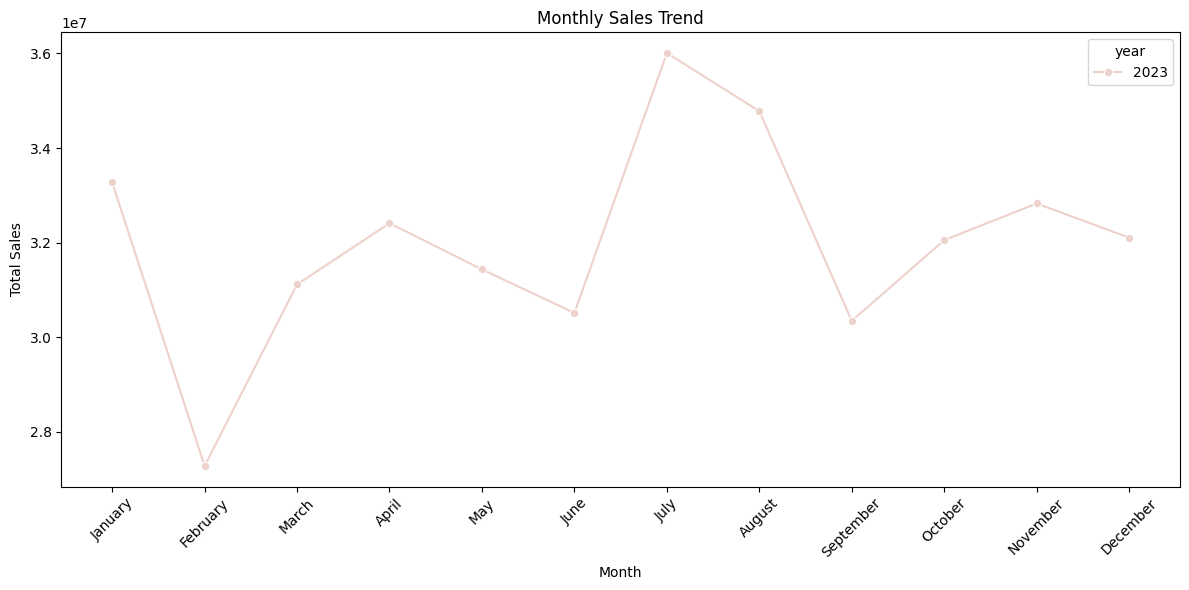

In [ ]:
#2/1. Sales Trend Over Time (Monthly) :-

# Aggregate monthly sales :
monthly_sales = (
    df.groupby(["year", "month_name"])["sales"]
    .sum()
    .reset_index()
)

# Order months correctly :
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
monthly_sales["month_name"] = pd.Categorical(
    monthly_sales["month_name"], categories=month_order, ordered=True
)
monthly_sales = monthly_sales.sort_values("month_name")

# Visualization :
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x="month_name", y="sales", hue="year", marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

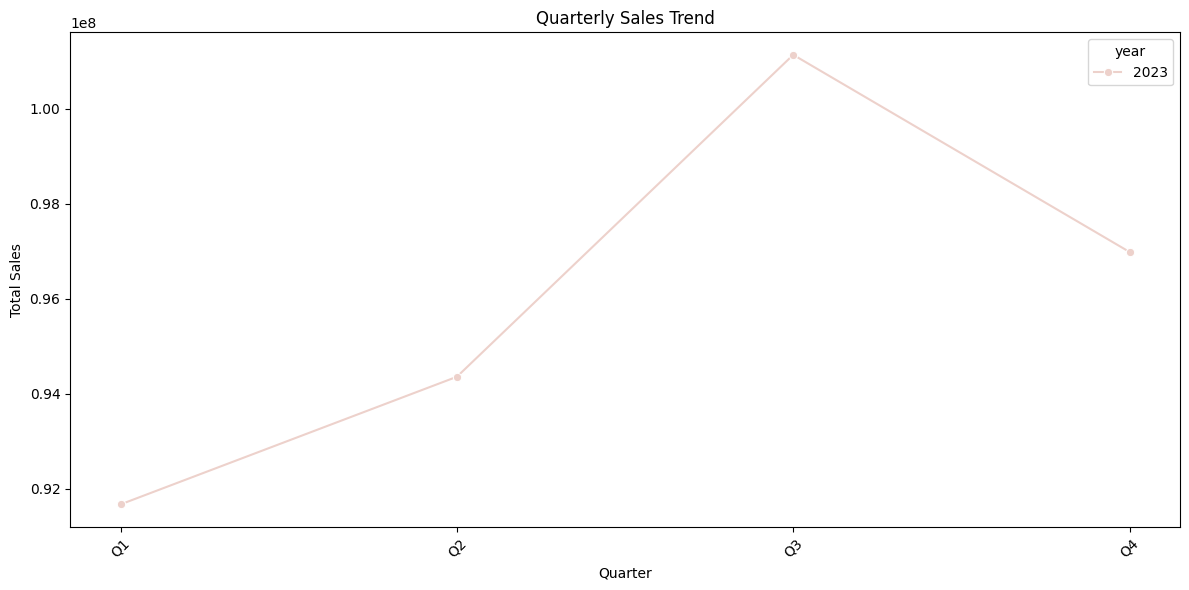

In [ ]:
#2/2. Sales Trend Over Time (Quarterly) :-

#Add 'quarter' column for quarterly analysis and aggregate :
df['quarter'] = df['order_date'].dt.quarter
quarterly_sales = df.groupby(['year', 'quarter'])['sales'].sum().reset_index()
quarter_names = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
quarterly_sales['quarter_name'] = quarterly_sales['quarter'].map(quarter_names)
quarter_order = ['Q1', 'Q2', 'Q3', 'Q4']
quarterly_sales['quarter_name'] = pd.Categorical(quarterly_sales['quarter_name'], categories=quarter_order, ordered=True)
quarterly_sales = quarterly_sales.sort_values(['year', 'quarter_name'])

# Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=quarterly_sales, x='quarter_name', y='sales', hue='year', marker='o')
plt.title('Quarterly Sales Trend')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

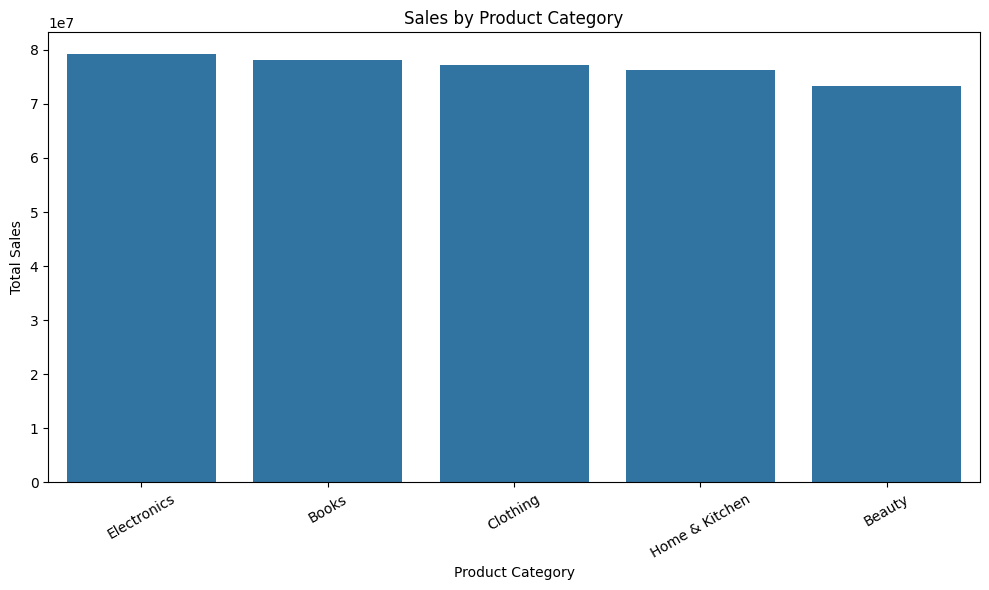

In [ ]:
#3. Category-wise Sales Performance :-

category_sales = (
    df.groupby("product_category")["sales"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

#Visualization :
plt.figure(figsize=(10,6))
sns.barplot(data=category_sales, x="product_category", y="sales")
plt.title("Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

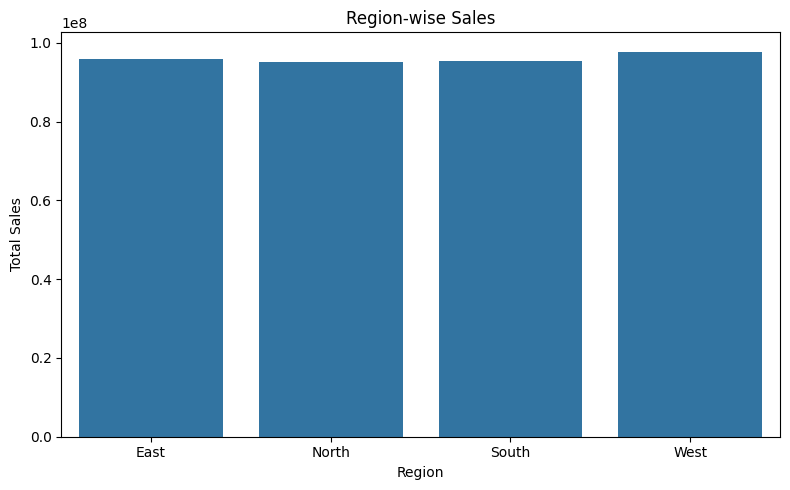

In [ ]:
#4. Region-wise Sales Distribution :-

region_sales = (
    df.groupby("region")["sales"]
    .sum()
    .reset_index()
)

#Visualization :
plt.figure(figsize=(8,5))
sns.barplot(data=region_sales, x="region", y="sales")
plt.title("Region-wise Sales")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

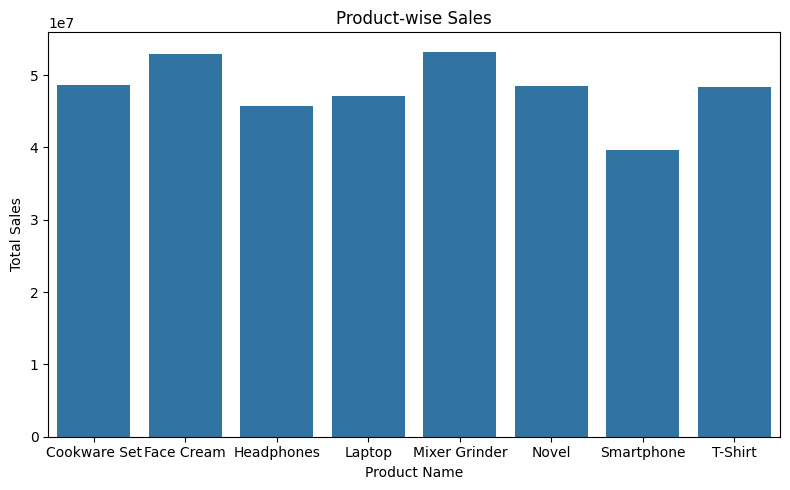

In [ ]:
#5. Product-wise Sales Performance :-

product_sales = (
    df.groupby("product_name")["sales"]
    .sum()
    .reset_index()
)

#Visualization :
plt.figure(figsize=(8,5))
sns.barplot(data=product_sales, x="product_name", y="sales")
plt.title("Product-wise Sales")
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

### ***-: CUSTOMER BEHAVIOR ANALYSIS :-***

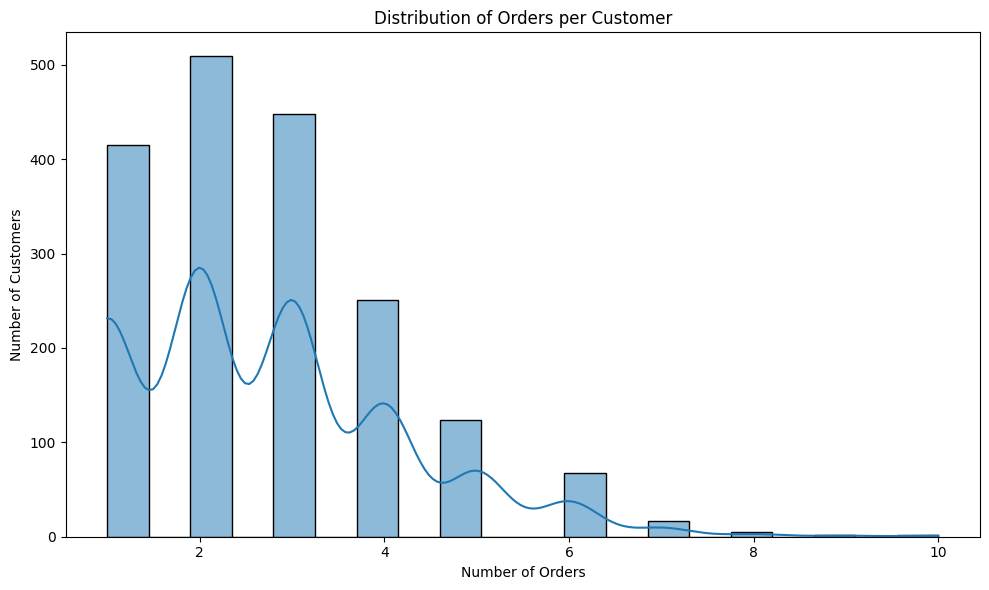

In [ ]:
#1. Calculate Orders per Customer :-

#Calculate number of orders per customer :
orders_per_customer = (
    df.groupby("customer_id")["order_id"]
    .nunique()
    .reset_index(name="num_orders")
)
orders_per_customer.head()

#Visualization :
plt.figure(figsize=(10,6))
sns.histplot(orders_per_customer["num_orders"], bins=20, kde=True)
plt.title("Distribution of Orders per Customer")
plt.xlabel("Number of Orders")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

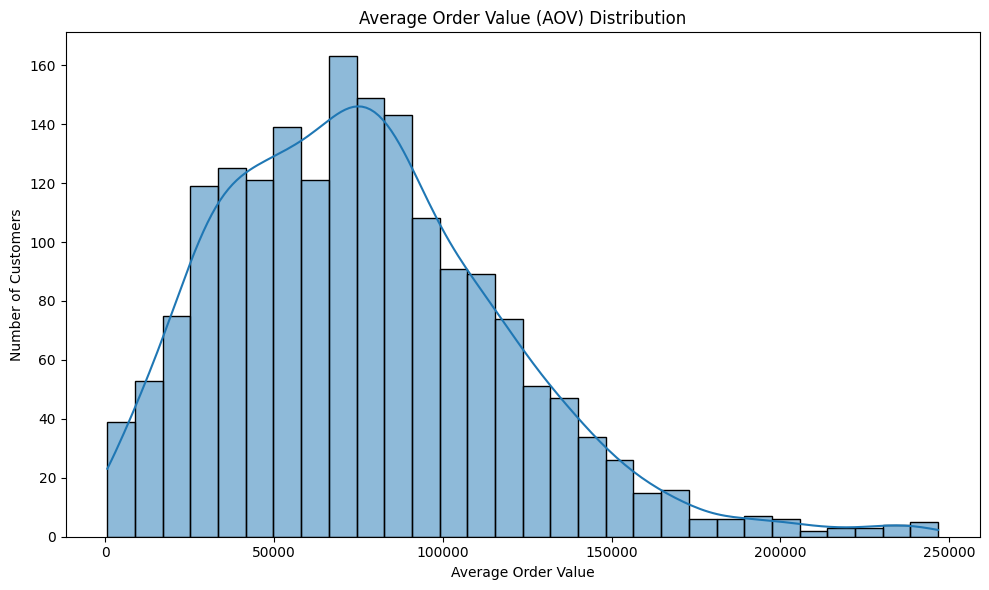

In [ ]:
#2. Average Order Value (AOV) Distribution :-

#Calculate AOV per customer :
aov_per_customer = (
    df.groupby("customer_id")
    .agg(
        total_sales=("sales", "sum"),
        total_orders=("order_id", "nunique")
    )
    .reset_index()
)
aov_per_customer["aov"] = (
    aov_per_customer["total_sales"] / aov_per_customer["total_orders"]
)
aov_per_customer.head()

#Visualization :
plt.figure(figsize=(10,6))
sns.histplot(aov_per_customer["aov"], bins=30, kde=True)
plt.title("Average Order Value (AOV) Distribution")
plt.xlabel("Average Order Value")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()

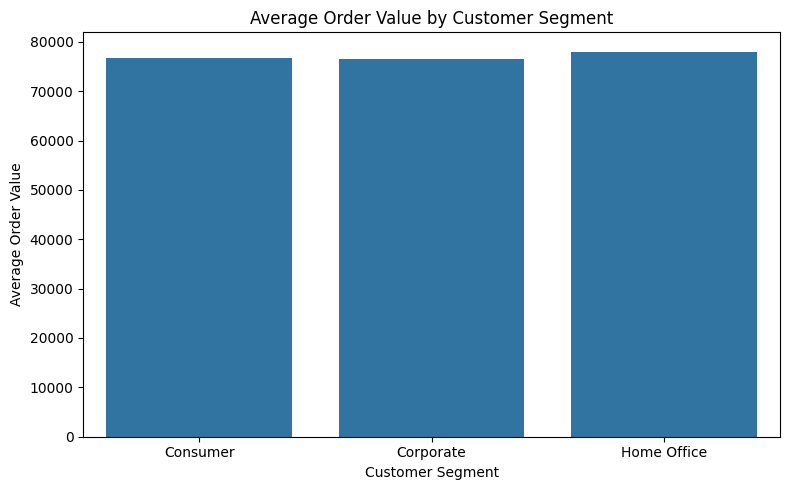

In [ ]:
#3. AOV by Customer Segment :-

segment_aov = (
    df.groupby("customer_segment")["sales"]
    .mean()
    .reset_index()
)

#Visualization :
plt.figure(figsize=(8,5))
sns.barplot(data=segment_aov, x="customer_segment", y="sales")
plt.title("Average Order Value by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Average Order Value")
plt.tight_layout()
plt.show()

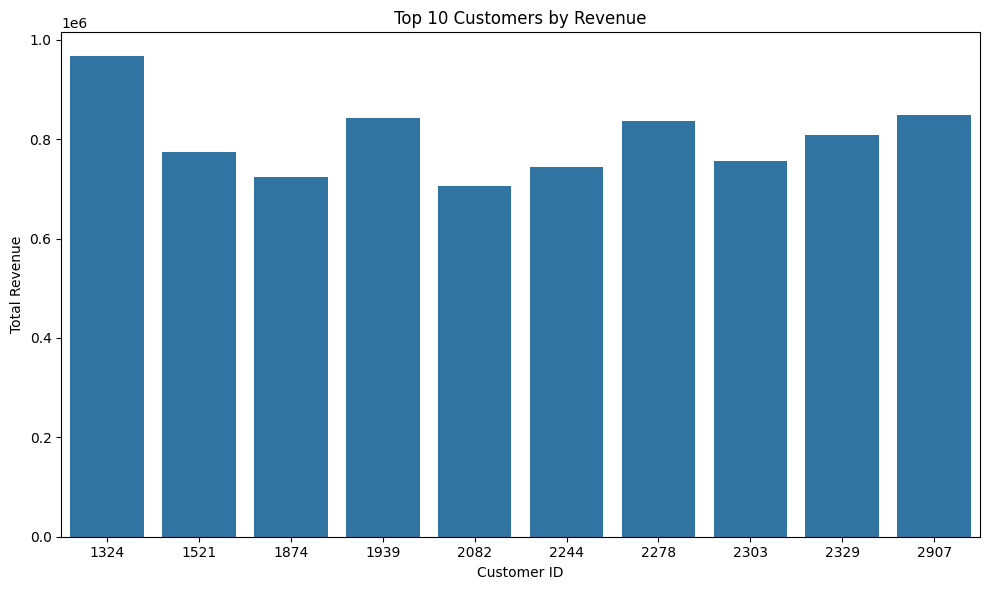

In [ ]:
#4. Top Customers by Revenue :-

customer_revenue = (
    df.groupby("customer_id")["sales"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)
top_10_customers = customer_revenue.head(10)
top_10_customers

#Visualization :
plt.figure(figsize=(10,6))
sns.barplot(
    data=top_10_customers,
    x="customer_id",
    y="sales"
)
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Customer ID")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

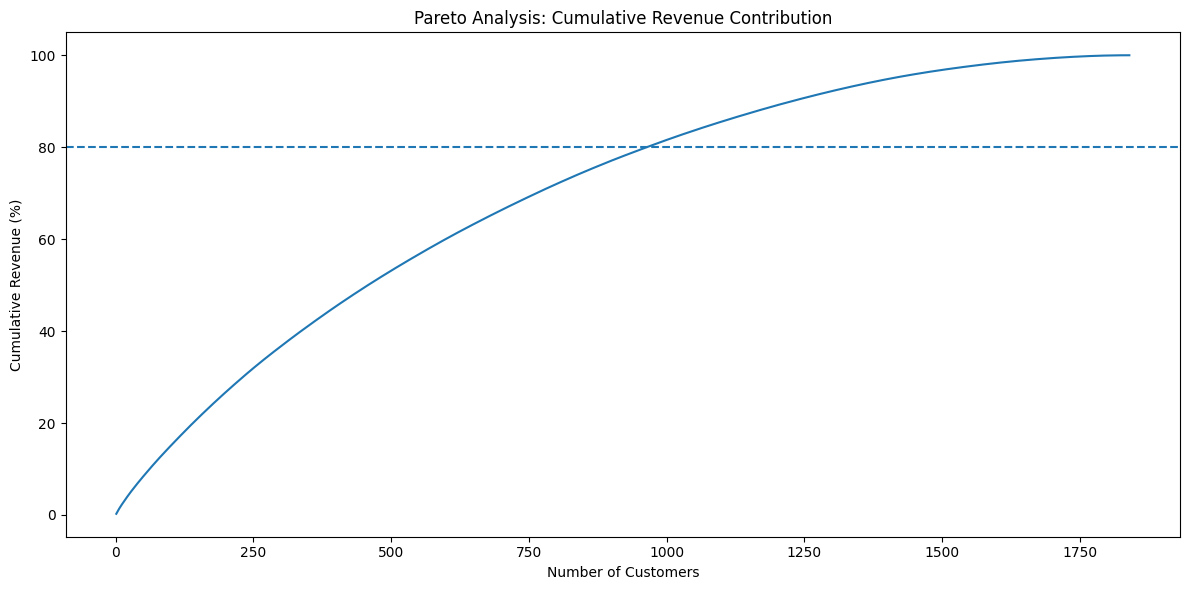

In [ ]:
#5. Pareto Analysis :-

#Cumulative revenue calculation :
customer_revenue["cumulative_revenue"] = customer_revenue["sales"].cumsum()
customer_revenue["cumulative_percentage"] = (
    customer_revenue["cumulative_revenue"] / customer_revenue["sales"].sum()
) * 100

#Visualization :
plt.figure(figsize=(12,6))
plt.plot(
    range(1, len(customer_revenue) + 1),
    customer_revenue["cumulative_percentage"]
)
plt.axhline(80, linestyle="--")
plt.title("Pareto Analysis: Cumulative Revenue Contribution")
plt.xlabel("Number of Customers")
plt.ylabel("Cumulative Revenue (%)")
plt.tight_layout()
plt.show()

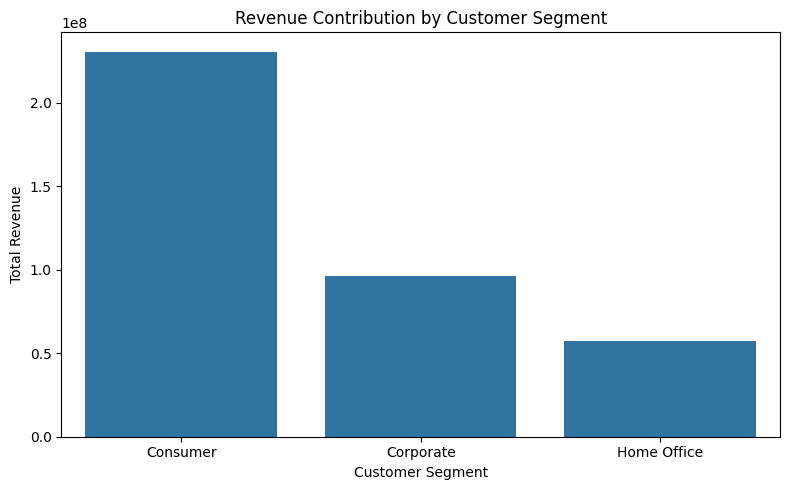

In [ ]:
#6. Revenue Contribution by Customer Segment :-

segment_revenue = (
    df.groupby("customer_segment")["sales"]
    .sum()
    .reset_index()
)

#Visualization :
plt.figure(figsize=(8,5))
sns.barplot(
    data=segment_revenue,
    x="customer_segment",
    y="sales"
)
plt.title("Revenue Contribution by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

### ***-: CONCLUSION :-***

This analysis explored e-commerce sales data to understand sales performance, customer behavior, and revenue distribution.
The results indicate that sales are influenced by time-based trends such as quarterly seasonality, while product-wise analysis reveals that a limited number of products and categories contribute significantly to overall revenue. Customer behavior analysis shows that most customers place only a few orders, whereas a small segment of repeat and high-value customers accounts for a disproportionate share of sales, consistent with the Pareto principle.
These insights suggest that businesses can improve performance by focusing on customer retention strategies, personalized marketing for high-value customers, and optimization of top-performing products and categories.


---



### ***-: BUSINESS DELIVERABLES & DATA EXPORTS :-***

In [ ]:
#1. Quarterly Sales Summary :-

# Create quarter column :
df["quarter"] = df["order_date"].dt.to_period("Q").astype(str)

quarterly_sales = (
    df.groupby(["year", "quarter"])
    .agg(
        total_sales=("sales", "sum"),
        total_orders=("order_id", "nunique"),
        total_customers=("customer_id", "nunique")
    )
    .reset_index()
)
quarterly_sales

# Exporting CSV :
quarterly_sales.to_csv("quarterly_sales_summary.csv", index=False)

In [ ]:
#2. Product Performance Report :-

product_performance = (
    df.groupby(["product_category", "product_name"])
    .agg(
        total_sales=("sales", "sum"),
        total_quantity_sold=("quantity", "sum"),
        avg_unit_price=("unit_price", "mean")
    )
    .sort_values("total_sales", ascending=False)
    .reset_index()
)
product_performance.head()

# Exporting CSV :
product_performance.to_csv("product_performance_report.csv", index=False)

In [ ]:
#3. Region-wise Sales Report :-

region_sales_report = (
    df.groupby("region")
    .agg(
        total_sales=("sales", "sum"),
        total_orders=("order_id", "nunique")
    )
    .reset_index()
)
region_sales_report

# Exporting CSV :
region_sales_report.to_csv("region_sales_report.csv", index=False)

In [ ]:
#4. Top Customers by Revenue :-

top_customers = (
    df.groupby("customer_id")["sales"]
    .sum()
    .sort_values(ascending=False)
    .head(100)
    .reset_index()
)
top_customers

# Exporting CSv :
top_customers.to_csv("top_100_customers_by_revenue.csv", index=False)

In [ ]:
# Downloading All CSV :-

from google.colab import files
files.download("quarterly_sales_summary.csv")
files.download("product_performance_report.csv")
files.download("region_sales_report.csv")
files.download("top_100_customers_by_revenue.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### ***-: BUSINESS DELIVERABLES :-***

To support data-driven decision-making, key aggregated datasets were
exported for different business stakeholders:

- Quarterly sales summary for management and forecasting
- Product performance report for category managers
- Region-wise sales report for operational planning
- Top customer revenue list to support customer intelligence initiatives

These deliverables ensure the analysis can be directly applied in real
business workflows.


---

